In [1]:
import pandas as pd
import numpy as np #добавим библеотеку для применения метода floor в изменении типов данных
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

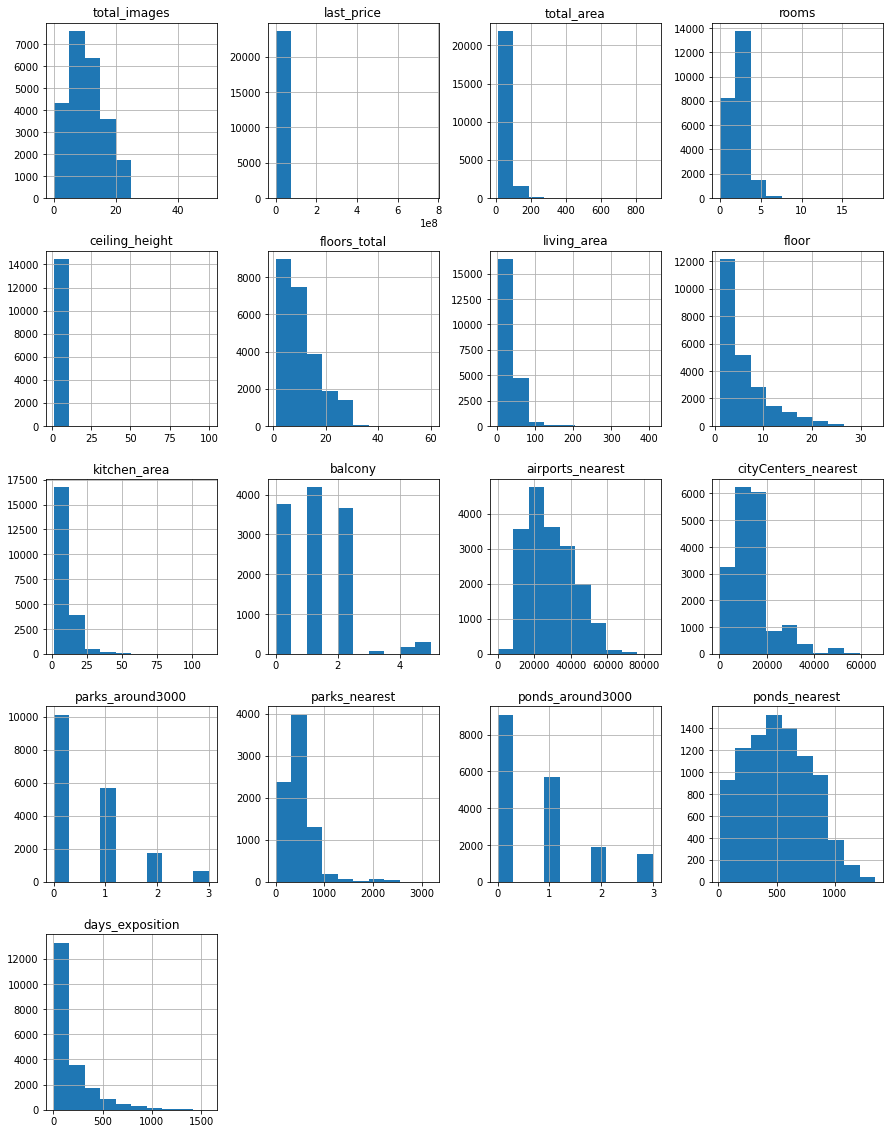

In [4]:
data.hist(figsize=(15,20));

В рамках обзора данных было установлено следующее:
- не все названия столбцов приведены к нижнему регистру;
- наблюдаются проблемы у параметров с неверными типами данных: например, у общего количества этажей (floors_total) - тип данных float;
- также присутствуют пропуски в столбцах.
Данные проблемы решим на этапе Предобработка данных.

# Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- ceiling_height           9195 - нет информации о высоте потолков, оставляем Null
- floors_total               86 - возможно, не заполнили данные, оставляем Null
- living_area              1903 - Null
- is_apartment            20924 - пропущенные значения не являются апартаментами, поменяем на False
- kitchen_area             2278 - Null
- balcony                 11519 - без балкона меняем на 0
- locality_name              49 - возможно, не заполнили данные, оставляем Null
- airports_nearest         5542 - поблизости отсутствуют аэропорты, оставляем Null
- cityCenters_nearest      5519 - не рядом с центром города, оставляем Null
- parks_around3000         5518 - в радиусе 3-х км отсутствуют парки, оставляем Null
- parks_nearest           15620 - парков нет, оставляем Null
- ponds_around3000         5518 - в радиусе 3-х км отсутствуют пруды, оставляем Null
- ponds_nearest           14589 - прудов нет, оставляем Null
- days_exposition          3181 - объявление не опубликовано, оставляем Null

In [6]:
data['is_apartment'] = data['is_apartment'].fillna('False') #Меняем Null на True
data['balcony'] = data['balcony'].fillna('0') #Меняем Null на 0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменение типов данных для следующих строк:
- last_price - int
- first_day_exposition - date (для удобства работы с датой)
- is_apartment - bool (для работы с булевым значением)
- balcony - int
- days_exposition - Int64 (используем arrays.IntegerArray или Int)
- floors_total - Int64 

Во всех случаях изменение типов данных экономит память

Целесообразно проверить на ошибки с помощью try except

In [8]:
try:
    data['last_price'] = data['last_price'].astype('int')
    print('Изменен-1')
except:
    print('Ошибка-1')
    
try:    
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
    print('Изменен-2')
except:
    print('Ошибка-2')
    
try:
    data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True}) # используем метод map() для изменения каждого элемента массива
    print('Изменен-3')
except:
    print('Ошибка-3')
        
try:
    data['balcony'] = data['balcony'].astype('int')
    print('Изменен-4')
except:
    print('Ошибка-4')
    
try:
    data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64') #округляем в меньшую сторону с помощью метода floor()
    print('Изменен-5')
except:
    print('Ошибка-5')
    
try:
    data['floors_total'] =  data['floors_total'].astype('Int64')
    print('Изменен-6')
except:
    print('Ошибка-6')


Изменен-1
Изменен-2
Изменен-3
Изменен-4
Изменен-5
Изменен-6


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          20924 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [10]:
len(data['locality_name'].unique())

365

In [11]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно выделить следующие варианты изменения уникальных значений:
- Привести все "е" на "ё";
- Меняем "городской поселок" "посёлок городского типа";
- Привести все названия к нижнему регистру

In [12]:
data['locality_name'] = data['locality_name'].str.lower()

In [13]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [14]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [15]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

In [16]:
data.duplicated().sum() #проверяем количество явных дупликатов

0

In [17]:
data.describe()#При анализе описания данных будем ориентироваться на среднеквадратическое отклонение

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


total_images - std не значительное, резких аномальных значений не наблюдается.

last_price - std имеет высокое значение.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

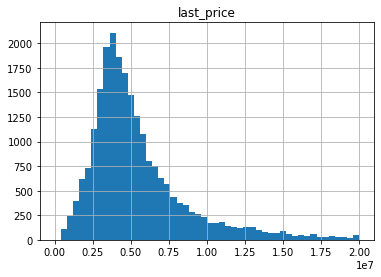

In [18]:
data.hist('last_price', bins=50, range=(0,2e+07))

In [19]:
print('Меньше 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('Меньше 1.000.000:', data.query('last_price > 1e+06')['last_price'].count())
print('Больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

Меньше 100.000: 1
Меньше 1.000.000: 23454
Больше 100.000.000: 37


- Квартир меньше 1млн. достаточное кол-во, чтобы не являться аномальным значением
- Стоимостью больше 100млн. похоже на аномалию, следует удалить

In [20]:

data.drop(index=data.query('last_price > 1e+08').index,inplace=True)#воспользуемся параметрами функции drop
print('Больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

Больше 100.000.000: 0


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

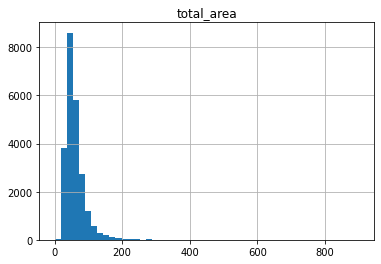

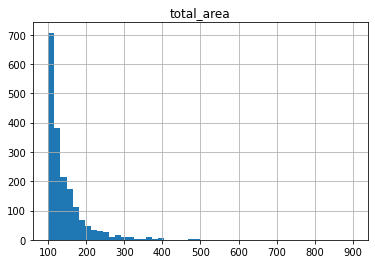

In [21]:
data.hist('total_area', bins=50, range=(0,900))
data.hist('total_area', bins=50, range=(100,900))

Среднеквадратическое отклонение у total_area говорит о наличии аномальных значений.

На графике видно аномальное значение у значения кв.м 500.
Проверим кол-во квартир с показателями больше 10 кв.м и больше 500 кв.м.

In [22]:
print('Менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('Более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())

Менее 10 кв.м.: 0
Более 500 кв.м.: 3


Три квартиры более 500 кв.м. сильно выбиваются из общей квадратуры. Следует их удалить

In [23]:
data.drop(index=data.query('total_area > 500').index, inplace=True)

У rooms минимальное значение - 0. Стоит проверить, что представляет из себя такая квартира без комнат.

In [24]:
print('Без комнаты:', data.query('rooms == 0')['rooms'].count())

Без комнаты: 197


Без комнаты достаточное кол-во квартир, чтобы не являться аномальным значением.
Важно установить тип данных квартир, это аппартаменты или студия?

In [25]:
print('Без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 
print('Без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 

Без комнат и апартаменты: 0
Без комнат и студии: 138


Квартиры с показателем в столбце rooms = 0 не являются аномальным значением.
Проверим квартиры с большим количеством комнат.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

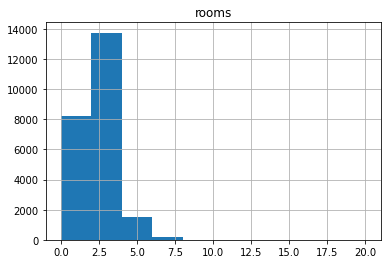

In [26]:
data.hist('rooms', bins=10, range=(0,20))

In [27]:
print('Более 7 комнат:',data.query('rooms > 7')['rooms'].count())#выглядит аномально, удалим значения в следующей строке

Более 7 комнат: 27


In [28]:
data.drop(index=data.query('rooms > 7').index,inplace=True)

В ceiling_height максимальное значение потолков = 100м, а минимальное = 1м. Трудно себе представить такие квартиры, проверим аномальность значений, возможно наблюдается опечатка.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

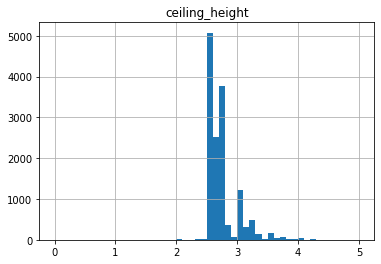

In [29]:
data.hist('ceiling_height', bins=50, range=(0,5))

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

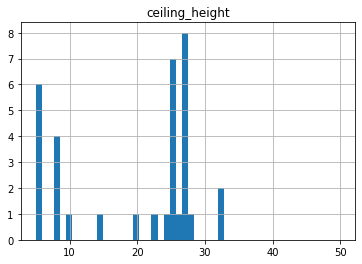

In [30]:
data.hist('ceiling_height', bins=50, range=(5,50))

In [31]:
print('от 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()))
print('от 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()))
print('от 25м до 40м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 40')['ceiling_height'].count()))
print('от 40м до 50м: ' + str(data.query('ceiling_height > 40 and ceiling_height < 50')['ceiling_height'].count()))
print('от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()))

от 4 до 5м: 36
от 5 до 25м: 14
от 25м до 40м: 19
от 40м до 50м: 0
от 50м: 1


Предположим, что квартиры от 4м до 25м не опечатка, но аномальное значение. Следует удалить.

In [32]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

Исправляем опечатки и делим 25 и36 м. на 10

In [33]:
data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10

355      2.50
3148     3.20
4643     2.50
4876     2.70
5246     2.70
5669     2.60
5807     2.70
6246     2.50
9379     2.50
10773    2.70
11285    2.50
14382    2.50
17857    2.70
18545    2.50
20478    2.70
21377    2.75
21824    2.70
22336    3.20
22938    2.70
Name: ceiling_height, dtype: float64

In [34]:
data.drop(index=data.query('ceiling_height > 36').index,inplace=True) #удаляем значения больше 36

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

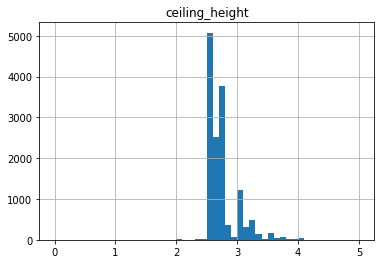

In [35]:
data.hist('ceiling_height', bins=50, range=(0,5))

In [36]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)#удаляем данные значения

In [37]:
print('меньше 2.5м : ' + str(data.query('ceiling_height < 2.5')['ceiling_height'].count()))

меньше 2.5м : 0


floors_total
- есть одноэтажные дома, но это не похоже на выброс
- стоит также проверить кол-во в многоэтажных домах

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

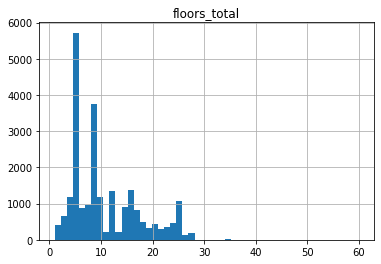

In [38]:
data.hist('floors_total', bins=50)

In [39]:
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30 и более этажных домах : ',data.query('floors_total > 30')['floors_total'].count())

Квартир в одноэтажных домах :  23
Квартир в 30 и более этажных домах :  31


In [40]:
data.drop(index=data.query('floors_total > 30').index,inplace=True) #удаляем значения более 30 этажей, т.к. похоже на выбросы

living_area стоит проверить значения ниже 10 кв.м., а также больше 175 кв.м.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

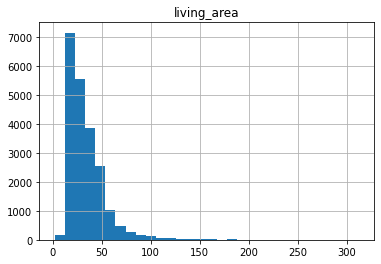

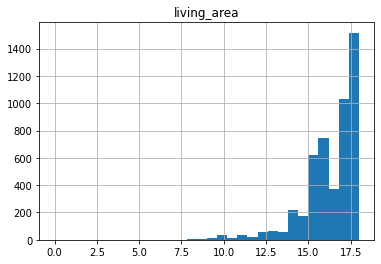

In [41]:
data.hist('living_area', bins=30)
data.hist('living_area', bins=30, range = (0, 18))

In [42]:
print('Меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Больше 200 кв.м.: ',data.query('living_area > 200')['living_area'].count())

Меньше 10 кв.м.:  25
Больше 200 кв.м.:  12


In [43]:
#удалим данные значение как аномальные
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

kitchen_area: проверим аномальные значения

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

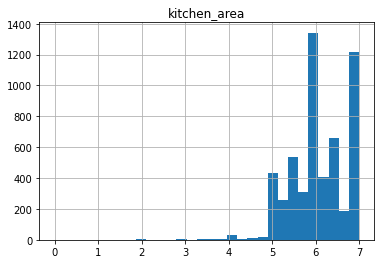

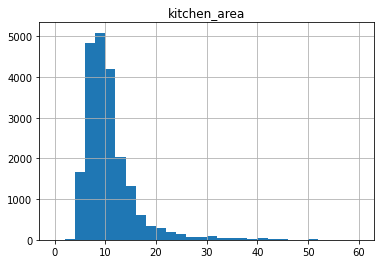

In [44]:
data.hist('kitchen_area', bins=30, range = (0, 7))
data.hist('kitchen_area', bins=30, range = (0, 60))

In [45]:
print('Меньше 3 кв.м.: ',data.query('kitchen_area < 3')['kitchen_area'].count())
print('Больше 50 кв.м.: ',data.query('kitchen_area > 50')['kitchen_area'].count())

Меньше 3 кв.м.:  11
Больше 50 кв.м.:  34


In [46]:
#удалим данные значение как аномальные
data.drop(index=data.query('kitchen_area < 3').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

days_exposition - проверим аномальность значений

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

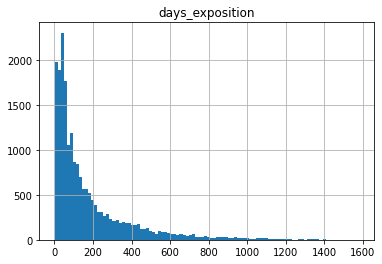

In [47]:
data.hist('days_exposition', bins = 100)

In [48]:
print('Объявлению больше 3,28 лет : ',data.query('days_exposition > 1200')['days_exposition'].count())

Объявлению больше 3,28 лет :  90


In [49]:
#удалим как аномальные
data.drop(index=data.query('days_exposition > 1200').index,inplace=True)

Были удалены аномальные значения, которые в основном были ниже первого квартиля и выше 3-го квартиля. Также в ceiling_height были изменены данные: деление параметров высоты потолков от 25 до 36 метров на 10.

# Посчитайте и добавьте в таблицу новые столбцы

In [50]:
data['one_sqm'] = data['last_price'] / data['total_area'] #цена одного кв.м.

In [51]:
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek #день недели публикации

In [52]:
data['month'] = data['first_day_exposition'].dt.month #месяц публикации

In [53]:
data['year'] = data['first_day_exposition'].dt.year #год публикации

In [54]:
#пишем функцию для типов этажей квартиры
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1)

data['floor_category_corr'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
) #добавим для последующего расчета взаимосвязи

In [55]:
#расстояние в км до центра города
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True) #приводим в порядок название столбца
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

# Исследовательский анализ данных

Строим отдельные гистограммы для каждого из параметров

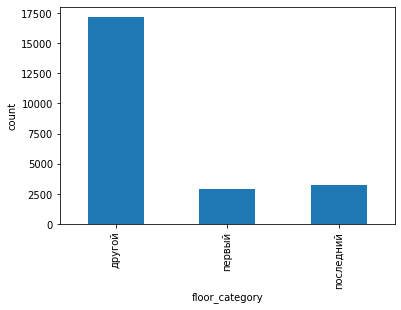

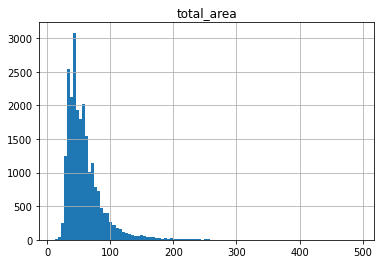

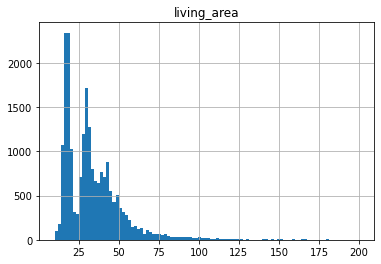

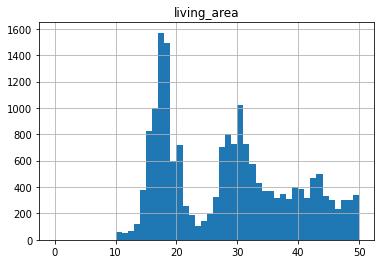

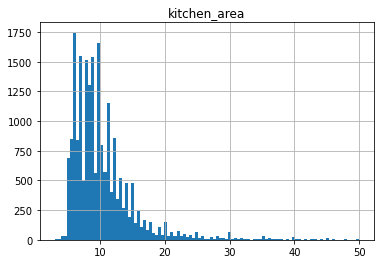

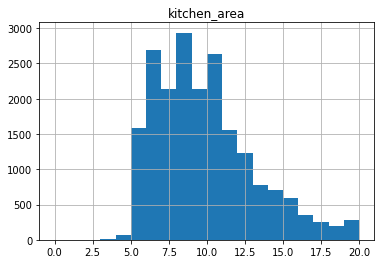

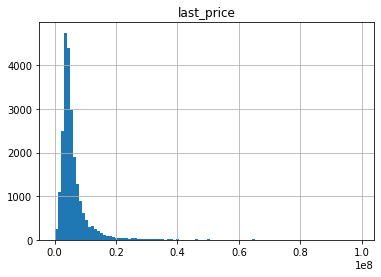

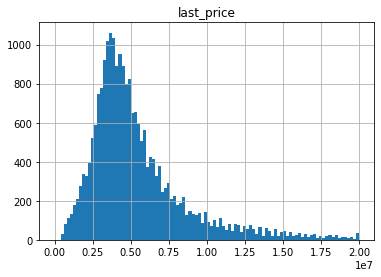

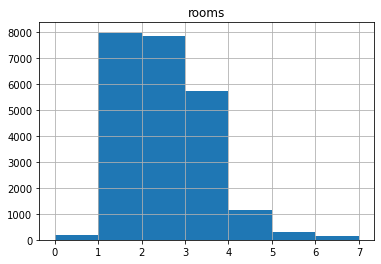

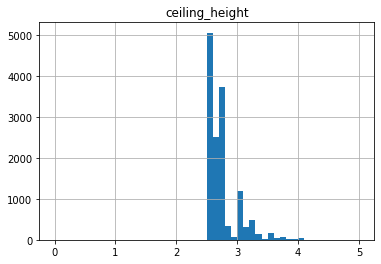

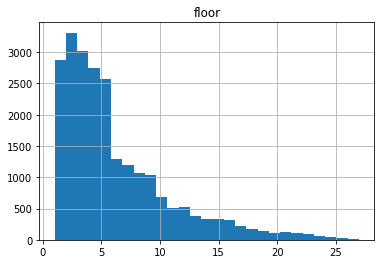

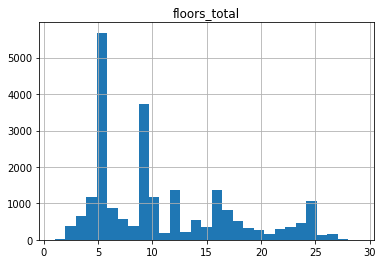

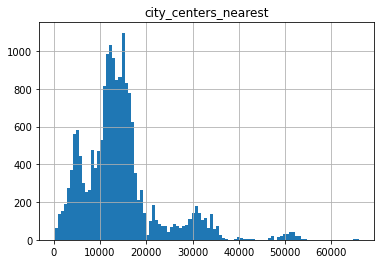

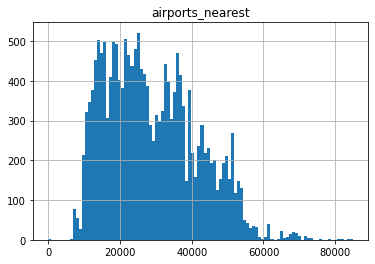

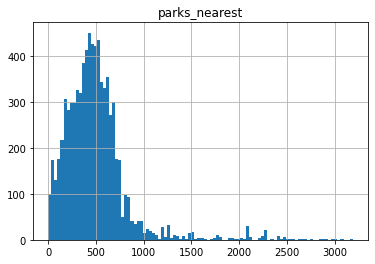

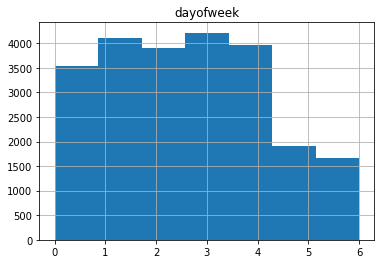

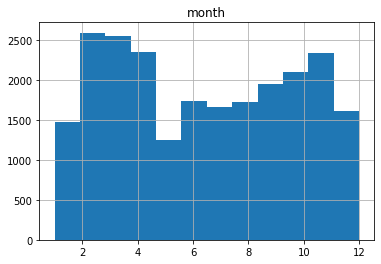

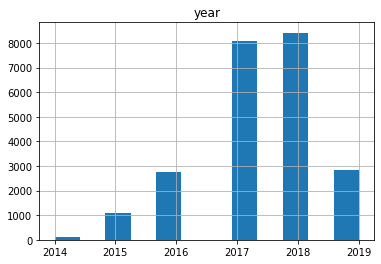

In [57]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count');

data.hist('total_area', bins=100);

data.hist('living_area', bins=100);
data.hist('living_area', bins=50, range=(0,50));

data.hist('kitchen_area', bins=100);
data.hist('kitchen_area', bins=20, range=(0,20));

data.hist('last_price', bins=100);
data.hist('last_price', bins=100, range=(0,2e+07));

data.hist('rooms', bins=data['rooms'].max());

data.hist('ceiling_height', bins=50, range=(0,5));

data.hist('floor', bins=data['floor'].max());

data.hist('floors_total', bins=data['floors_total'].max());

data.hist('city_centers_nearest', bins=100);

data.hist('airports_nearest', bins=100);

data.hist('parks_nearest', bins=100);

data.hist('dayofweek', bins=7);

data.hist('month', bins=12);
data.hist('year', bins=12);

- по категориям этажей больше всего объектов наблюдается в категории "другой", т.е не 1-ый и не последний, что достаточно логично;
- объектов с квадратурой более 100 кв.м значительно меньше, но это не является аномальным выбросом, возможно, это так называемое "элитное жилье", при этом пиковое значение наблюдается в районе 40-45 кв.м., что показывает наибольшкю популярность таких объектов недвижимости;
- по жилой площади наблюдается два пиковых значения: 18 и 30 кв.м., при этом на 24 кв.м. явно провал. Возможно, это связано со стандартами планировки таких объектов и популярностью 1-шек и 2-шек, которую можно будет наблюдать на следующем графике;
- график площади кухни выглядит как график нормального распределения (в виде колокола), при этом пик наблюдается между 7.5-10 кв.м., что говорит о наибольшей популярности такой площади кухни в объектах недвижимости;
- график цены объекта выглядит нормальным, т.е схожим с нормальным распределением. Это говорит о том, что в данных цены объекта нет значительных отклонений от среднего значения и можно установить закономерность последующего изменения цены на объекты недвижимости;
- однокомнатные и двухкомнатные квартиры наиболее популярные на рынке, после них по популярности идут 3-х комнатные;
- наблюдаемые пики по высоте в 2.5-3 м. потолков выглядят логичными,т.к соответстуют стандартам планировки;
- большая часть объектов находится на 1-5 этажах,объекты на более высоких этажах такой популярностью не пользуются;
- наблюдаются пики 5-этажных и 9-этажных домов - эхо советской застройки;
- наблюдаются два пика по удаленности от центра: меньший пик 5км и самый большой от 10-15 км;
- по удаленности от аэропорта достаточно много шумов: может указывать на наличие случайных или непредсказуемых изменений или вариаций в данных.
- по удаленности от парка большая часть в районе 500м., при этом сам график схож с графиком нормального распределения, что опять же показывает, что значения вокруг среднего распределены равномерно;
- по публикации объявлений есть провалы в субботу и воскресенье (в выходные дни низкая активность). С февраля по апрель наблюдалосась повышенная активность. Далее был плавный рост с июля по ноябрь. Провалы наблюдаются в декабре, январе и мае. Очень полезная информация для размещения объявлений или поиска жилья.
- также по годам публикаций пиковое значение набюладется в 2018 году, при этом в 2019 резкий спад предложений, что демонстрирует цикличность рынка недвижимости, а также влияние различных факторов (экономических, геополитических и других).

Как быстро продавались квартиры по days_exposition

Среднее время: 175
Медианное время: 94

Количество объявлений, которые сняты через:
30 дней: 206
60 дней: 536
90 дней: 202


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

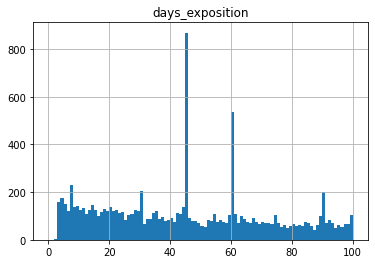

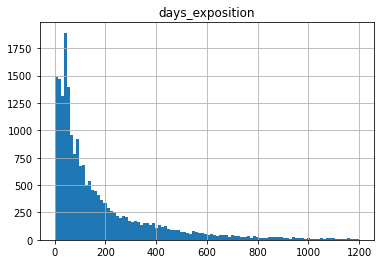

In [58]:
data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время:', int(data['days_exposition'].mean()))
print(f'Медианное время:', int(data['days_exposition'].median()))
print ()
print('Количество объявлений, которые сняты через:')
print('30 дней:', data[data['days_exposition']==30]['days_exposition'].count())
print('60 дней:', data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:', data[data['days_exposition']==90]['days_exposition'].count())
data.hist('days_exposition', bins=100)

Cреднее время продажи квартиры составляет 175 день или больше полгода. По медиане -  94 дня. Можно объяснить наличием квартир, которые продавались относительно продолжительное время. Так, можно разделить на две категории: быстрые продажи меньше медианного значения, долгие - больше среднего.

In [59]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqm,dayofweek,month,year,floor_category_corr,city_centers_nearest_km
count,23305.000000,2.330500e+04,23305.000000,23305.000000,14200.000000,23220.000000,21429.000000,23305.000000,21063.000000,23305.000000,...,7875.000000,17838.000000,8881.000000,20172.000000,23305.000000,23305.000000,23305.000000,23305.000000,23305.000000,17837.000000
mean,9.852650,6.114784e+06,59.136795,2.049818,2.749303,10.678898,33.784977,5.888436,10.382916,0.591247,...,491.007492,0.759446,521.306610,175.067817,98186.595676,2.572324,6.401802,2017.378846,1.015962,14.251163
std,5.675038,5.929383e+06,30.401572,1.020834,0.894590,6.538782,19.161428,4.864928,5.133741,0.958104,...,341.423670,0.929384,277.133113,205.678727,42209.279786,1.788945,3.488773,1.028310,0.512379,8.600059
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,10.000000,1.000000,3.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,299.000000,44.000000,76470.588235,1.000000,3.000000,2017.000000,1.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.090000,0.000000,...,455.000000,0.000000,505.000000,94.000000,94801.223242,3.000000,6.000000,2017.000000,1.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,1.000000,...,613.000000,1.000000,733.000000,227.000000,113793.103448,4.000000,10.000000,2018.000000,1.000000,16.000000
max,50.000000,9.900000e+07,494.100000,7.000000,32.000000,29.000000,200.000000,27.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,1200.000000,848484.848485,6.000000,12.000000,2019.000000,2.000000,66.000000


Ориентируясь на нижний квартиль Q1 по данному показателю можно сделать вывод, что 44 дня являются пороговым значением для 25% наименьших значений в наборе данных того же показателя. Другими словами, сделки по продаже объектов которые осуществлялись меньше 44 дней можно считать быстрыми. Идентичная ситуация и для Q3. Сделки по продаже объектов которые осуществлялись больше 227 дней можно считать необычно долгими.

**Установление взаимосвязи с помощью корреляции Пирсона**

In [60]:
factors = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_category_corr',
                  'dayofweek',
                  'month',
                  'year']

for i in factors:
    correl = data['last_price'].corr(data[i])
    print(f'Корреляция между last_price и {i} составляет: {correl:0.2%}')

Корреляция между last_price и total_area составляет: 75.51%
Корреляция между last_price и living_area составляет: 66.58%
Корреляция между last_price и kitchen_area составляет: 55.98%
Корреляция между last_price и rooms составляет: 45.83%
Корреляция между last_price и floor_category_corr составляет: 5.69%
Корреляция между last_price и dayofweek составляет: -0.09%
Корреляция между last_price и month составляет: 0.73%
Корреляция между last_price и year составляет: -4.11%


- Корреляция между "last_price" и "total_area" составляет 75.51%. Это говорит о том, что существует сильная положительная связь между общей площадью недвижимости и её ценой. Вероятно, более просторные недвижимости имеют более высокую стоимость.

- Корреляция между "last_price" и "living_area" составляет 66.58%. Это указывает на существование значительной положительной связи между жилой площадью и ценой недвижимости. Чем больше жилая площадь, тем выше вероятность более высокой стоимости недвижимости.

- Корреляция между "last_price" и "kitchen_area" составляет 55.98%. Это говорит о наличии умеренной положительной связи между площадью кухни и ценой недвижимости. Более просторные кухни могут влиять на повышение цены недвижимости.

- Корреляция между "last_price" и "rooms" составляет 45.83%. Это указывает на некоторую положительную связь между количеством комнат и ценой недвижимости. Недвижимость с большим количеством комнат, скорее всего, будет иметь более высокую стоимость.

- Корреляция между "last_price" и "floor_category_corr" составляет 5.69%. Здесь наблюдается очень слабая положительная связь между категорией этажа и ценой недвижимости. Возможно, некоторые категории этажей имеют незначительное влияние на цену.

- Корреляция между "last_price" и "dayofweek" составляет -0.09%. Здесь присутствует очень слабая отрицательная связь между днем недели и ценой недвижимости.

- Корреляция между "last_price" и "month" составляет 0.73%. Это указывает на некоторую положительную, но очень слабую связь/
- Корреляция между last_price и year составляет: -4.11%. Слабая отрицательная связь.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

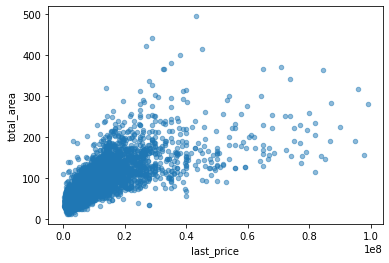

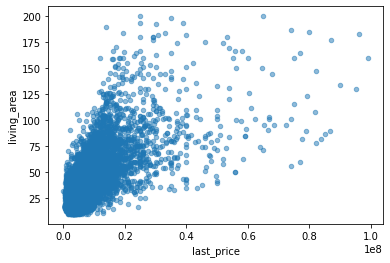

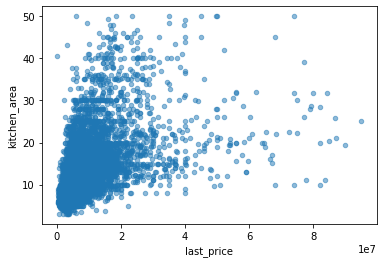

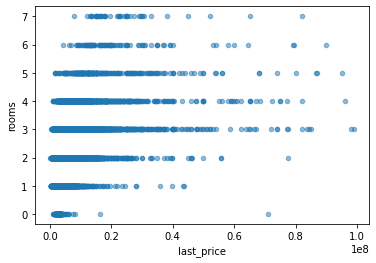

In [61]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.5)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5)
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.5)

<AxesSubplot:xlabel='rooms'>

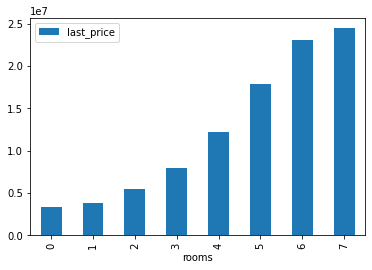

In [62]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')

По графику видна прямая зависимость между количеством комнат и общей стоимостью жилья, при этом коэф. корреляции показывал незначительную связь.

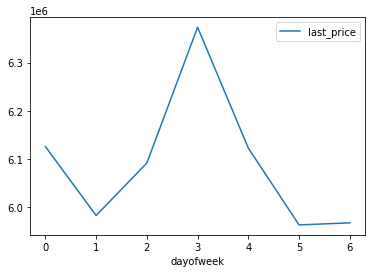

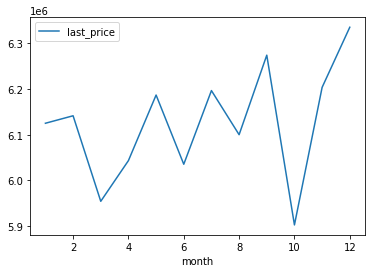

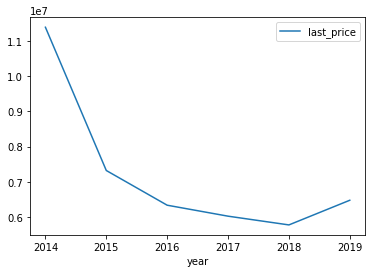

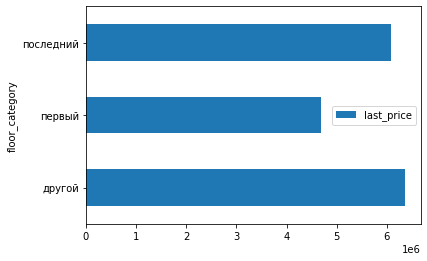

In [63]:
data.pivot_table(index='dayofweek',values='last_price').plot(y='last_price', kind='line')
data.pivot_table(index='month',values='last_price').plot(y='last_price', kind='line')
data.pivot_table(index='year',values='last_price').plot(y='last_price', kind='line')
data.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='barh');

- по дню недели пик цены наблюдается в четверг;
- по месяцам самый сильный провал в цене наблюдался в октябре;
- по годам наблюдалась отрицательная динамика с 2014 по 2018 гг, далее ситуация изменилась в обратную сторону;
- цена ниже всего на первых этажах квартир; 

  **Важно отметить, что взаимосвязи между ценой и этими показателями практически нет, поэтому в рамках исследования влияния факторов на цену эти показатели не имеют веса.**

**Cредняя цена одного квадратного метра в топ-10 населенных пунктах**

<AxesSubplot:ylabel='locality_name'>

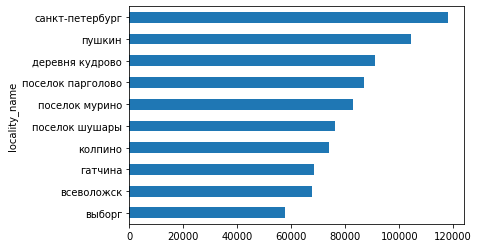

In [64]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10] # только первые 10 строк с наибольшими значениями.
top_10['price_sqm'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_sqm'],ascending=True, inplace=True)
top_10['price_sqm'].plot(kind='barh')

Наименьшая цена в Выборге, наибольшая в Санкт-Петербурге, что достаточно логично.

**Средняя цена каждого километра**

<AxesSubplot:xlabel='city_centers_nearest_km'>

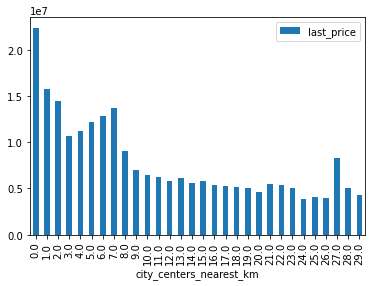

In [65]:
(data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price')
    .plot(kind='bar'))

- Самый пик у недвижимости до 1км;
- Есть два интересных пика в 7км. (возможно самое популярное место по удаленности) и 27км.(возможно там и находится сектор с элитным жильем)

Таким образом, наблюдается в основном обратная зависимость между удаленностью от центра и ценой за недвижимость. При этом график показывает и наличие прямой зависимости:
- от 1 до 2-х км наблюдается обратная зависимость (с ростом удаленности падает цена);
- от 3-х до 6 км зависимость прямая: цена растет с удаленностью от центра (возможно это связано с лучшими условиями городской инфраструктуры: больше магазинов, парков, доступнее транспорт, при этом от центра не так далеко - спрос на объекты с такой удаленностью выше, из-за чего цена и растет);
- далее наблюдается стандартное снижение цены с ростом удаленности, за исключением пика в 27км.

# Общий вывод

## Предобработка данных
*В рамках предобработки данных были произведены следующие операции*: 
- удаление пропусков и их заполнение;
- обработка аномальных значений;
- изменение типов данных;
- обработка дупликатов;

## Добавление новых столбцов
*Были добавлены столбцы:*
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры, который разделили по категориям («первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

## Проведение исследовательского анализа данных
*Были получены интересные выводы:*
- 4-х комнатные квартиры популярнее однушек;
- основной сезон публикации объялений наблюдается с февраля по апрель;
- быстрыми продажами считаются объявления с датой публикации в 3 месяца, долгими - более полугода;
- общая площадь недвижимости, жилая площадь и площадь кухни сильнее всего влияют на общую стоимость жилья;
- топ-3 по цене за кв.м. занимают Питер, Пушкин и деревня Кудрово;
- в 27км от центра недвижимость стоит также, как и в 8-ми км., возможно там располагается частный элитный поселок;
- по кол-ву дней срока действия объявления видно, что данные были представлены с площадки, где размещение объявлений происходит через определенную систему или алгоритм, по которым существует необходимость продления объявлений, иначе они будут сняты с площадки.